<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Assignment_07/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [1]:
# <1> 
# Import libraries

import matplotlib.pyplot as plt
import os
import fnmatch
import pandas as pd
import glob


In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

os.getcwd()


'/content'

In [3]:
from zipfile import ZipFile
#CollegeScorecard_Raw_Data.zip = /content/CollegeScorecard_Raw_Data.zip

#with ZipFile(CollegeScorecard_Raw_Data.zip, 'r') as zip:
  #zip.extractall()
  #print('Done')
!unzip /content/CollegeScorecard_Raw_Data.zip

Archive:  /content/CollegeScorecard_Raw_Data.zip
replace CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

os.listdir('/content/CollegeScorecard_Raw_Data/')


['MERGED1998_99_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2009_10_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1999_00_PP.csv',
 '.DS_Store',
 'MERGED2004_05_PP.csv',
 'MERGED2008_09_PP.csv',
 'Crosswalks.zip',
 'MERGED2010_11_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2011_12_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2015_16_PP.csv',
 'data.yaml']

In [5]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

file_list = glob.glob('/content/CollegeScorecard_Raw_Data/MERGED*')
#file_list = []
#for file_name in os.listdir('/content/CollegeScorecard_Raw_Data'):
    #if fnmatch.fnmatch(file_name, 'MERGED*'):
        #file_list.append(file_name)
        #print(file_name)


In [6]:
file_list

['/content/CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2018_19_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MER

In [7]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

#data = pd.DataFrame[]
df = []
YEAR = []
for f in file_list:
    YEAR = f.split('/')[3].split('MERGED')[1].split('_')[0]
    df.append(pd.read_csv(f, usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]).assign(YEAR=YEAR))
dfs = pd.concat(df, ignore_index=True)    

dfs = dfs.astype({"YEAR": int})


In [8]:
# <6> 
# explore the new dataframe

dfs.shape


(163331, 7)

In [9]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163331 entries, 0 to 163330
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44911 non-null   float64
 5   TUITIONFEE_IN  79194 non-null   float64
 6   YEAR           163331 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 8.7+ MB


In [10]:
# stats
dfs.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,1.633310e+05,163330.000000,44911.000000,79194.000000,163331.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367,2007.249481
std,4.571721e+06,2.189217,0.217062,9985.998016,6.608266
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000,2002.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000,2008.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000,2013.000000
max,4.914640e+07,9.000000,1.000000,74787.000000,2018.000000


In [11]:
# first 5
dfs.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5.0,NaN,NaN,1998
1,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1998
2,100690,Amridge University,AL,5.0,NaN,NaN,1998
3,100706,University of Alabama in Huntsville,AL,5.0,NaN,NaN,1998
4,100724,Alabama State University,AL,5.0,NaN,NaN,1998


In [12]:
# last 5
dfs.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
163326,48154401,National Personal Training Institute of Cleveland,OH,3.0,NaN,NaN,2015
163327,48387801,Bay Area Medical Academy - San Jose Satellite ...,CA,8.0,NaN,NaN,2015
163328,48400201,High Desert Medical College - Bakerfield,CA,8.0,NaN,31107.0,2015
163329,48414501,Vantage College-San Antonio,TX,6.0,NaN,NaN,2015
163330,48621101,American Institute of Pharmaceutical Technolog...,NJ,2.0,NaN,NaN,2015


In [13]:
dfs.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,False,False,False,False,True,True,False
1,False,False,False,False,True,True,False
2,False,False,False,False,True,True,False
3,False,False,False,False,True,True,False
4,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...
163326,False,False,False,False,True,True,False
163327,False,False,False,False,True,True,False
163328,False,False,False,False,True,False,False
163329,False,False,False,False,True,True,False


In [14]:
dfs.isna().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [ ]:
# variables
dfs.columns

In [ ]:
# sample
dfs.sample(20)

In [17]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

UMBC = dfs[dfs['INSTNM'].str.contains("University of Maryland-Baltimore County")]
UMBC


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
8501,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
15432,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
22497,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
29042,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
36024,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
43667,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
49955,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
57482,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
63870,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013


In [18]:
UMBC = UMBC.sort_values(by=['YEAR'])

In [19]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

UMBC.shape

(23, 7)

In [20]:
UMBC.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [21]:
UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
150809,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
136874,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
85525,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
78842,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [22]:
UMBC.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
113061,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
157220,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
36024,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
49955,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
71525,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [23]:
UMBC.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
85525,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
143578,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
71525,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018
8501,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
15432,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
49955,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
29042,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
136874,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
57482,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
98693,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008


In [24]:
UMBC.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
150809,False,False,False,False,True,True,False
136874,False,False,False,False,True,True,False
1982,False,False,False,False,True,True,False
85525,False,False,False,False,True,True,False
78842,False,False,False,False,True,False,False
43667,False,False,False,False,False,False,False
57482,False,False,False,False,False,False,False
22497,False,False,False,False,False,False,False
92009,False,False,False,False,False,False,False
143578,False,False,False,False,False,False,False


In [25]:
UMBC.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [ ]:
UMBC.info()

In [ ]:
UMBC.describe()

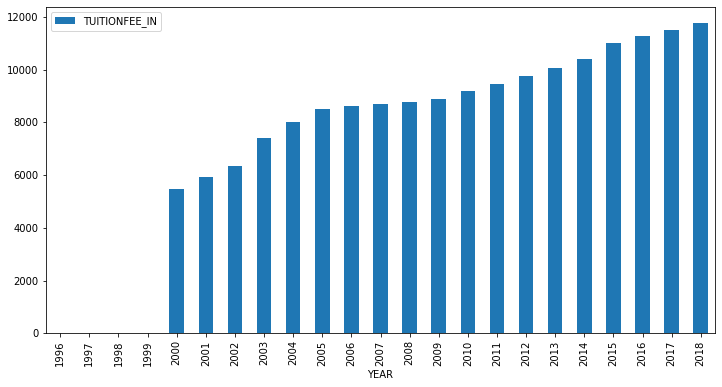

In [36]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

UMBC.plot(kind='bar',x='YEAR',y='TUITIONFEE_IN', figsize=(12,6))
#fig, ax = plt.subplots(figsize=(12,6)) # 12 maxes it bigger




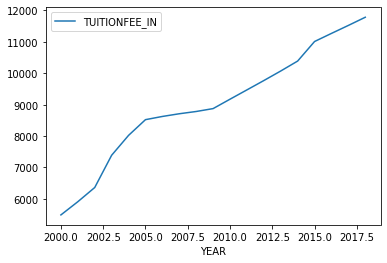

In [46]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

ax = plt.gca()

UMBC.plot(kind='line',x='YEAR',y='TUITIONFEE_IN',ax=ax)


In [47]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

TUITIONFEE_list = UMBC['TUITIONFEE_IN'].values.tolist()
print(TUITIONFEE_list)

[nan, nan, nan, nan, 5490.0, 5910.0, 6362.0, 7388.0, 8020.0, 8520.0, 8622.0, 8708.0, 8780.0, 8872.0, 9171.0, 9467.0, 9764.0, 10068.0, 10384.0, 11006.0, 11264.0, 11518.0, 11778.0]


In [48]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

tuition_series = pd.Series(TUITIONFEE_list)
change = tuition_series.pct_change()
print(change)


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5     0.076503
6     0.076481
7     0.161270
8     0.085544
9     0.062344
10    0.011972
11    0.009974
12    0.008268
13    0.010478
14    0.033702
15    0.032276
16    0.031372
17    0.031135
18    0.031387
19    0.059900
20    0.023442
21    0.022550
22    0.022573
dtype: float64


In [49]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity
rounded = []
for i in change:
    rounded.append(round(i, 2))
print(rounded)

[nan, nan, nan, nan, nan, 0.08, 0.08, 0.16, 0.09, 0.06, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.06, 0.02, 0.02, 0.02]


In [50]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

UMBC['PCT_CHANGE'] = rounded
UMBC.head(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
150809,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
136874,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
85525,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
78842,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
43667,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,0.08
57482,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,0.08
22497,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,0.16
92009,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,0.09
143578,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,0.06


In [ ]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

UMBC.plot(kind='bar',x='YEAR',y='PCT_CHANGE')



In [ ]:
ax = plt.gca()

UMBC.plot(kind='line',x='YEAR',y='PCT_CHANGE',ax=ax)

In [39]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

# misunderstood the instructions so this one creates a function that pulls university and calculates
# the percent change in tuition at the same time
def pect_change():
    college = dfs[dfs['INSTNM'].str.contains("Johns Hopkins University")]
    college = college.sort_values(by=['YEAR'])
    TUITIONFEE_list = college['TUITIONFEE_IN'].values.tolist()
    tuition_series = pd.Series(TUITIONFEE_list)
    change = tuition_series.pct_change()
    rounded = []
    for i in change:
        rounded.append(round(i, 2))
    college['PCT_CHANGE'] = rounded
    return college
JHU = pect_change()
JHU

 

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
150797,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
136864,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
85516,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
78833,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
43658,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,0.05
57473,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,0.05
22489,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,0.05
92002,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,0.05
143571,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,0.05


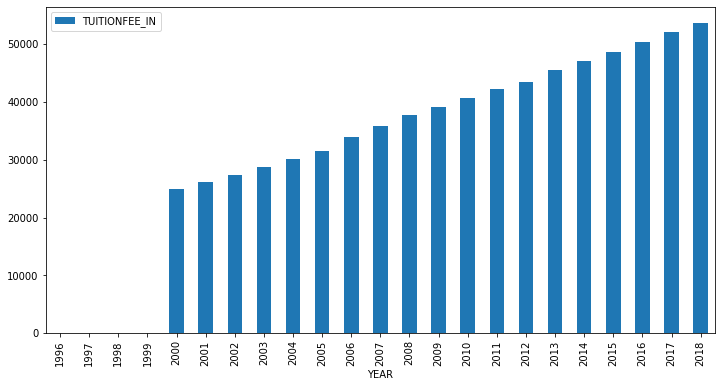

In [40]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

JHU.plot(kind='bar',x='YEAR',y='TUITIONFEE_IN', figsize=(12,6))



In [ ]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)



In [43]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

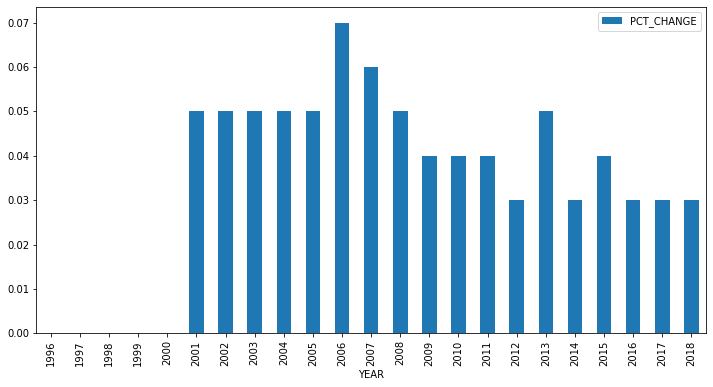

In [44]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

JHU.plot(kind='bar',x='YEAR',y='PCT_CHANGE', figsize=(12,6))



In [91]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.
umbc0 = UMBC['PCT_CHANGE']
umbc1 = UMBC['YEAR']
umbc2 = pd.concat([umbc1, umbc0], axis=1)

umbc2


,YEAR,PCT_CHANGE
150809,1996,NaN
136874,1997,NaN
1982,1998,NaN
85525,1999,NaN
78842,2000,NaN
43667,2001,0.08
57482,2002,0.08
22497,2003,0.16
92009,2004,0.09
143578,2005,0.06


In [96]:
umbc2 = umbc2.rename(columns={'PCT_CHANGE': 'UMBC_PCT'})
umbc2

,YEAR,UMBC_PCT
150809,1996,NaN
136874,1997,NaN
1982,1998,NaN
85525,1999,NaN
78842,2000,NaN
43667,2001,0.08
57482,2002,0.08
22497,2003,0.16
92009,2004,0.09
143578,2005,0.06


In [ ]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)



In [131]:
JHU0 = JHU['PCT_CHANGE']
JHU1 = JHU['YEAR']
JHU2 = pd.concat([JHU1, JHU0], axis=1)

JHU2

,YEAR,PCT_CHANGE
150797,1996,NaN
136864,1997,NaN
1973,1998,NaN
85516,1999,NaN
78833,2000,NaN
43658,2001,0.05
57473,2002,0.05
22489,2003,0.05
92002,2004,0.05
143571,2005,0.05


In [132]:
JHU2 = JHU2.rename(columns={'PCT_CHANGE': 'JHU_PCT'})
JHU2

,YEAR,JHU_PCT
150797,1996,NaN
136864,1997,NaN
1973,1998,NaN
85516,1999,NaN
78833,2000,NaN
43658,2001,0.05
57473,2002,0.05
22489,2003,0.05
92002,2004,0.05
143571,2005,0.05


In [133]:
# Now, merger the two data frames
# and display the new dataframe

#result = pd.concat([umbc2, JHU2])
#result
result = pd.merge(umbc2, JHU2, on="YEAR")

result

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,0.08,0.05
6,2002,0.08,0.05
7,2003,0.16,0.05
8,2004,0.09,0.05
9,2005,0.06,0.05


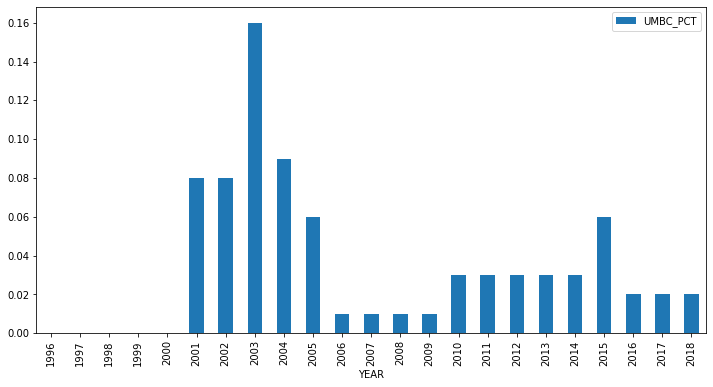

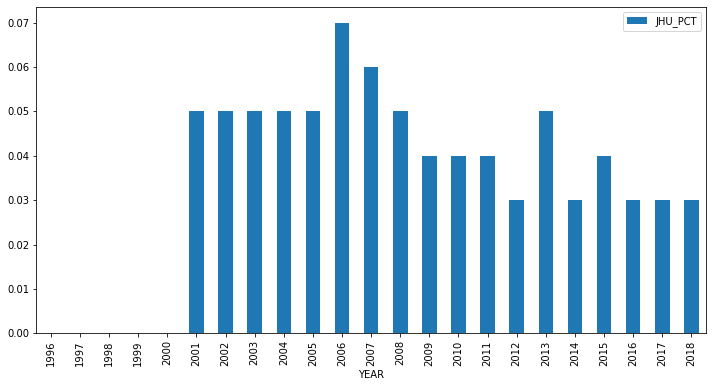

In [138]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

result.plot(kind='bar',x='YEAR',y='UMBC_PCT', figsize=(12,6))
result.plot(kind='bar',x='YEAR',y='JHU_PCT', figsize=(12,6))


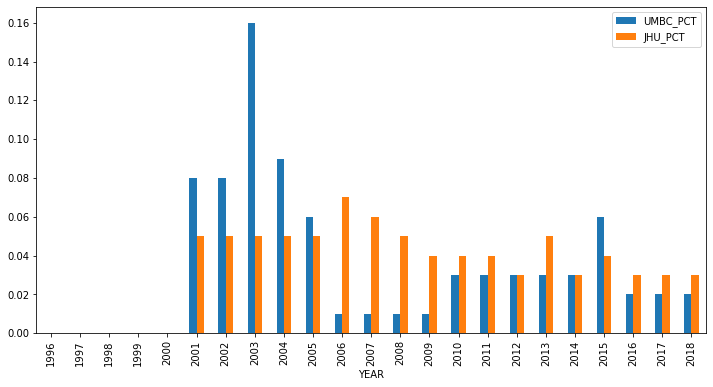

In [136]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

result.plot(kind='bar',x='YEAR',y=['UMBC_PCT', 'JHU_PCT'], figsize=(12,6))



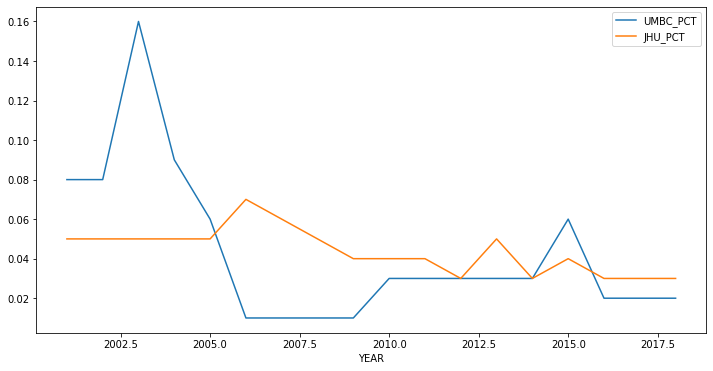

In [139]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

result.plot(kind='line',x='YEAR',y=['UMBC_PCT', 'JHU_PCT'], figsize=(12,6))



In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
##### UMBC experienced a spike in tuition change in 2003 and then a much smaller increase.
##### It held a steady percent increase from 2006-2009 and again from 2010-2014.
##### A larger tuition increase occured in 2015 before the percent increase again leveled out from 2016-2019
##### JHU has a more stead percent increase but overall higher percentage increase compared to UMBC

In [ ]:
# The end.